In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

2024-05-13 10:26:41.677959: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-13 10:26:42.388207: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-13 10:26:42.575756: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-05-13 10:26:42.575782: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if yo

In [21]:
def plot_resultaat(observation, prediction, path=None, title=None):
    fig, ax = plt.subplots(1,1,figsize=(14,4))
    ax.plot(prediction.index, prediction['P_pred'], 'orange', linestyle='-', zorder=1, label='P_pred')
    ax.plot(observation.index, observation['P'], zorder=0, label='P')
    plt.xlabel('Datum')
    plt.legend()
    plt.grid(True)
    ax.set_xlim(prediction.index[0], prediction.index[-1])
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.title(title)
    plt.savefig(path, dpi=100, transparent=False)
    

In [12]:
# inladen model
model = tf.keras.models.load_model('model_nieuw/model.h5')

13/13 [==============================] - 0s 2ms/step


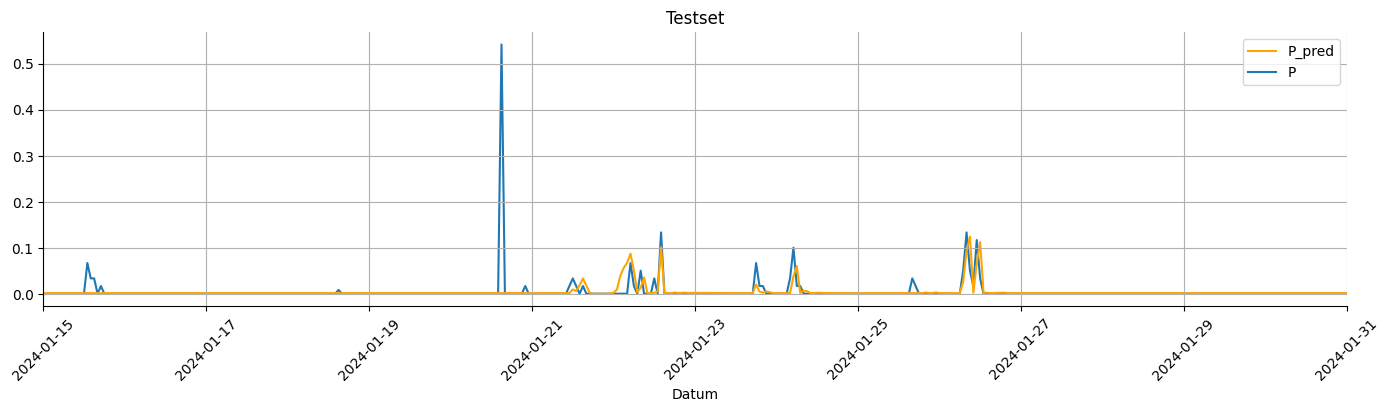

In [36]:
# inladen features
X_test = pd.read_csv('data/X_test_scaled_new.csv', index_col=0, parse_dates=True)

# inladen target
Y_test = pd.read_csv('data/Y_test_new.csv', index_col=0, parse_dates=True)

# maak voorspelling
y_test_hat = pd.DataFrame(index=X_test.index, data=model.predict(X_test), columns=['P_pred'])
y_test_hat[y_test_hat['P_pred'] < 0] = 0

# plot 
plot_resultaat(Y_test, y_test_hat, path='resultaat_testset.png', title="Testset")

36/36 [==============================] - 0s 3ms/step


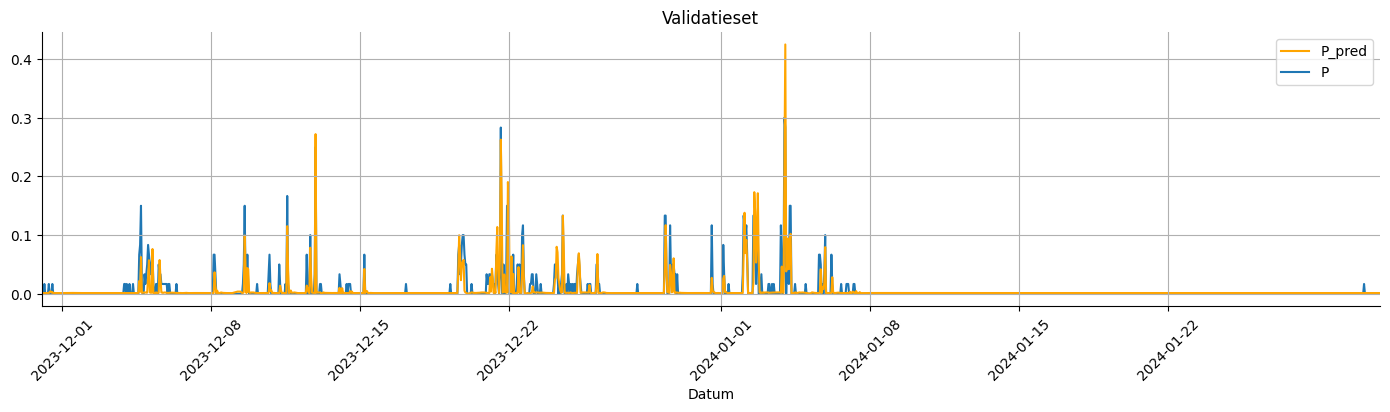

In [33]:
# inladen features
X_val = pd.read_csv('data/X_val_scaled_new.csv', index_col=0, parse_dates=True)

# inladen target
Y_val = pd.read_csv('data/Y_val_new.csv', index_col=0, parse_dates=True)

# maak voorspelling
y_val_hat = pd.DataFrame(index=X_test.index, data=model.predict(X_val), columns=['P_pred'])
y_val_hat[y_val_hat['P_pred'] < 0] = 0

# plot 
plot_resultaat(Y_val, y_val_hat, path='resultaat_validatieset.png', title="Validatieset")

### Selectie met start- en einddatum

In [34]:
def select_daterange(df, start_date, end_date):
    """
    Returns a DataFrame with only the rows between the start and end date.
    """
    mask = (df.index >= start_date) & (df.index < end_date)
    df_selected = df.loc[mask]
    return df_selected

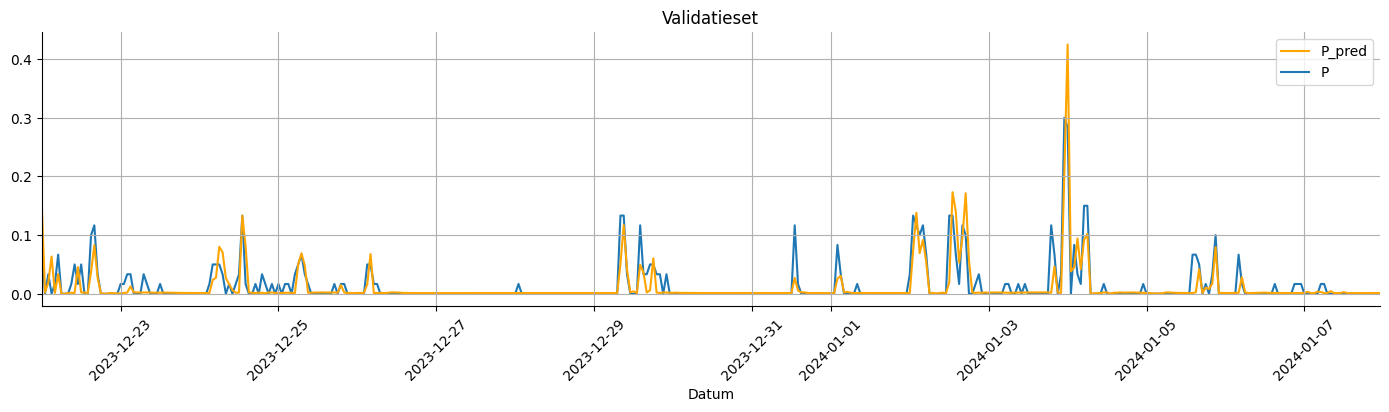

In [35]:
# kies startdatum 
start_date = pd.to_datetime('2023-12-22')

# kies einddatum
end_date = pd.to_datetime('2024-01-08')

plot_resultaat(select_daterange(Y_val, start_date, end_date), select_daterange(y_val_hat, start_date, end_date), path='resultaat_validatieset.png', title="Validatieset")